# colchecker.ipynb

The col_checker function takes 5 randomly generated columns in the range (0,8192) and line plots all pixel values along that column in order to identify which columns are ideal or poor choices to use as reference values.

For more information, see convertfits.md

Author : Darren Hunt, University of Washington

In [1]:
%matplotlib inline
import numpy as np
from astropy.io import fits  # open and read fits data
import matplotlib.pyplot as plt

In [2]:
def col_checker(f="asRaw-24960049.fits"):
    """Line plots all values along 5 randomly selected columns in a flat image for visual comparison.
    
    Parameters
    ----------
    f : str, optional
        Name of flat file. Default is the raw master flat, exp 24960049
    """
    
    flat = fits.getdata(f)
    w = flat.shape[0]  # width
    
    plt.style.use('ggplot')
    fig, ax = plt.subplots(1,1,figsize=(18,12))
    ax.set_title("Pixel values (5 random columns), "+f.rsplit('.',1)[0],fontsize=20)
    ax.set_xlabel("Pix",fontsize=16), ax.set_ylabel("Pixel value",fontsize=16)
    ax.tick_params(labelsize=14)
    
    x = np.arange(0,2048,1) 
    # generate 10 random columns to plots values of
    rand = np.random.randint(0,8192,size=5)
    rand = np.append([rand],[2952])  # to plot the default col for visual comparison
    for i in range(len(rand)):
        y = []
        for j in range(w):
            data = flat[(w-1)-j,rand[i]]
            y.append(data)
        ax.plot(x,y,label="col "+str(rand[i]),color='y' if rand[i]==2952 else (np.random.rand(3,)))
    
    ax.legend(loc='upper left',fontsize=14)
    plt.savefig(f.rsplit('.',1)[0]+".png",dpi=300,overwrite=True)
    plt.show()

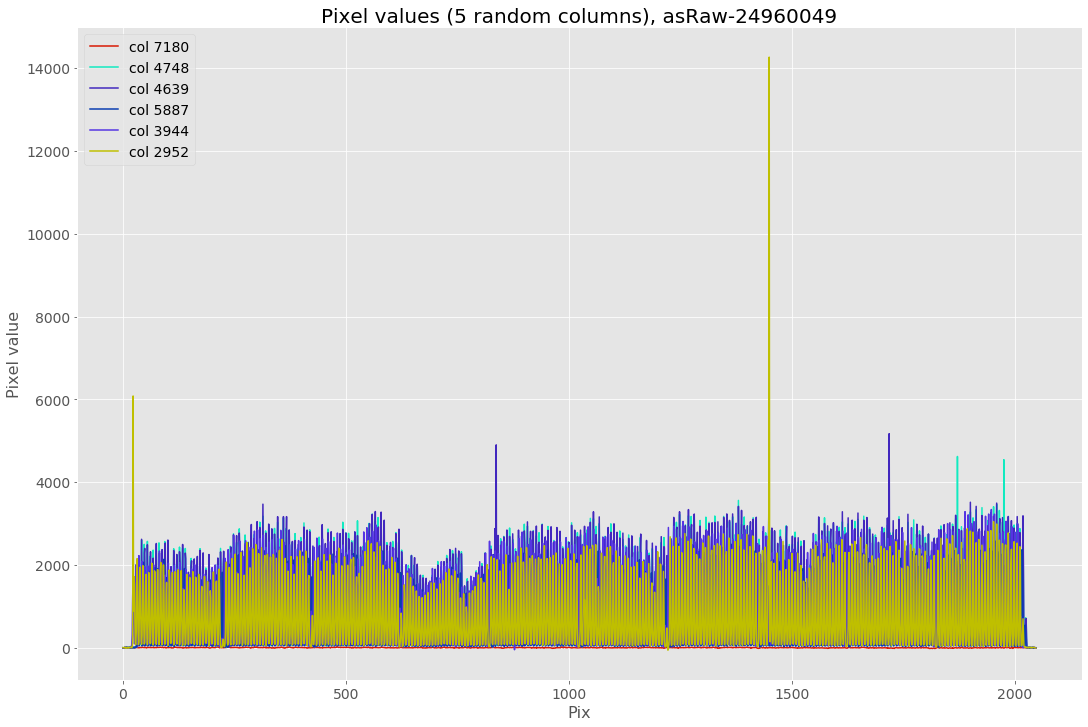

In [3]:
col_checker()

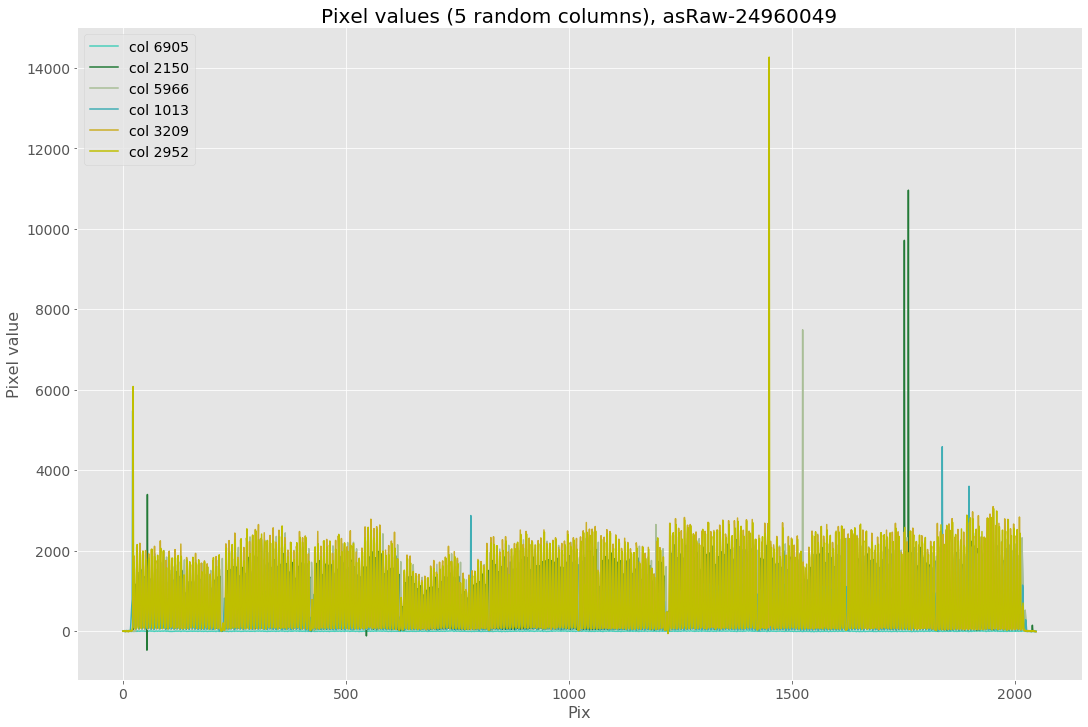

In [4]:
col_checker()

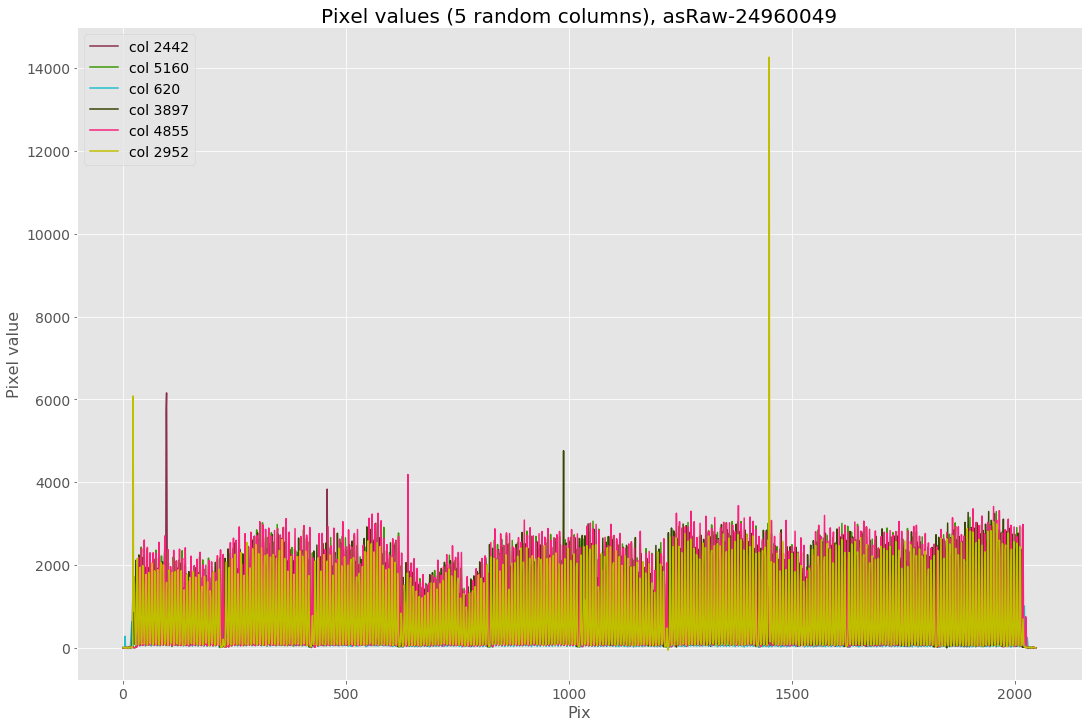

In [5]:
col_checker()